In [1]:
import sympy
from sympy import S, solve, Matrix, diff, plot, simplify, factor
from sympy import log as Log
from sympy import sin as Sin
from sympy import cos as Cos
from sympy import pi as Pi
from sympy.plotting import plot3d
from sympy.geometry import Point
%matplotlib inline

## Занятие 16
## Математический анализ
## Градиент функции нескольких переменных, производная по направлению, касательная плоскость.

    
### Задание 1
Найти градиент функции $z=x^2-xy-2y^2$ в произвольной точке и в точке М(1,2). Вычислить производную  в направлении, составляющем с положительным направлением оси ОХ угол 60 градусов, в точке М(1,2). 

In [2]:
from sympy.abc import x, y
def f(x, y):
    return x**2 - x*y - 2*y**2
def grad_f(f, *var):
    return Matrix([f(*var).diff(variable) for variable in var])
display(grad_f(f, x, y))
def grad_f_point(f, var_dict):
    return grad_f(f, *var_dict.keys()).subs(var_dict)
grad1 = grad_f_point(f, {x: 1, y: 2})
display(grad1, grad1.dot(Matrix((Cos(Pi/3), Sin(Pi/3)))))

Matrix([
[ 2*x - y],
[-x - 4*y]])

Matrix([
[ 0],
[-9]])

-9*sqrt(3)/2

###  Задание 2.
Поверхность задана уравнением $z = \frac{x^2}{2} - y^2$. Составить уравнение касательной плоскости и нормали в точке $М(2, -1, 1)$. Изобразить на графике.

Eq(z - 1, 2*x + 2*y - 2)

Eq(Eq(x/2 - 1, y/2 + 1/2), 1 - z)

Eq(z, 2*x + 2*y - 1)

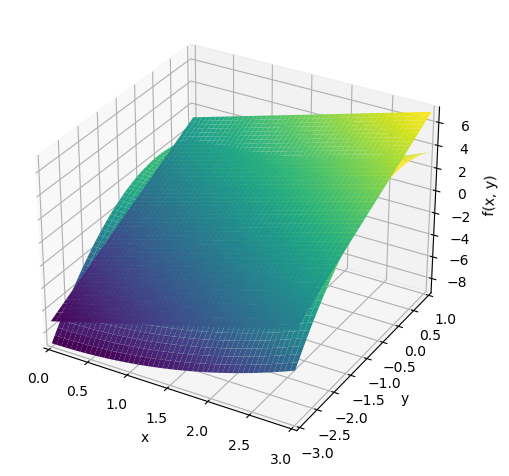

In [3]:
from sympy.abc import z
M = Point(2, -1, 1)
dictM = {x: M.x, y: M.y, z: M.z}
f = S(x**2)/2 - y**2
fdx, fdy = [f.diff(p).subs(dictM) for p in [x, y]]
planeM = sympy.Eq(z - M.z, fdx*(x - M.x) + fdy*(y - M.y))
norm_line = sympy.Eq(sympy.Eq((x - M.x)/fdx, (y - M.y)/fdy, evaluate=False), 
                     (z - M.z)/(-1), evaluate=False)
display(planeM, norm_line)
zz= solve(planeM, z)[0]
display(sympy.Eq(z, zz))
plot3d(zz, f, (x, 0, 3), (y, -3, 1))

###  Задание 3.
Поверхность задана уравнением $3xyz - z^3 = a^3$. Составить уравнение касательной плоскости и нормали к поверхности в точке $x = 0$, $y = a$. 

In [4]:
from sympy.abc import a
F = 3*x*y*z - z**3 - a**3
M = Point(0, a, solve(F.subs([(x, 0), (y, a)]), z)[0])
display(M)
dictM = {x: M.x, y: M.y, z: M.z}
Fdx, Fdy, Fdz = [F.diff(p).subs(dictM) for p in [x, y, z]]
display(Fdx, Fdy, Fdz)
norm_line = sympy.Eq(sympy.Eq((x - M.x)/Fdx,(y - M.y)/Fdy, evaluate=False), 
                   (z - M.z)/Fdz, evaluate=False)
display(norm_line)

Point3D(0, a, -a)

-3*a**2

0

-3*a**2

Eq(Eq(-x/(3*a**2), zoo*(-a + y)), -(a + z)/(3*a**2))

Рекомендуется разложить на множители левую часть уравнения касательной плоскости и затем записать ее в более простом виде, считая $a \neq 0$:

In [5]:
planeM = sympy.Eq(factor(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z)), 0)
display(planeM)

Eq(-3*a**2*(a + x + z), 0)

In [6]:
planeM = sympy.Eq(factor(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z))/(-3*a**2), 0)
display(planeM)

Eq(a + x + z, 0)

### Индивидуальное задание.
Поверхность задана уравнением $x^2 − 6x + y^2 + z^2 = 0$. Составить уравнение касательной плоскости и нормали в точке $(R\cos\alpha,R\sin\alpha,R)$.  Изобразить на графике при $R=3$, $\alpha=0.5\pi$.

In [7]:
from sympy.abc import R
F = x**2 - 6*x + y**2 + z**2
M = Point(R*Cos(a), R*Sin(a), R)
display(M)
dictM = {x: M.x, y: M.y, z: M.z}
Fdx, Fdy, Fdz = [F.diff(p).subs(dictM) for p in [x, y, z]]
display(Fdx, Fdy, Fdz)
planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0)
norm_line = sympy.Eq(sympy.Eq((x - M.x)/Fdx,(y - M.y)/Fdy, evaluate=False), 
                   (z - M.z)/Fdz, evaluate=False)
display(planeM, norm_line)

Point3D(R*cos(a), R*sin(a), R)

2*R*cos(a) - 6

2*R*sin(a)

2*R

Eq(2*R*(-R + z) + 2*R*(-R*sin(a) + y)*sin(a) + (-R*cos(a) + x)*(2*R*cos(a) - 6), 0)

Eq(Eq((-R*cos(a) + x)/(2*R*cos(a) - 6), (-R*sin(a) + y)/(2*R*sin(a))), (-R + z)/(2*R))

In [8]:
F = x**2 - 6*x + y**2 + z**2
R = 3
a = Pi/2
M = Point(R*Cos(a), R*Sin(a), R)
display(M)
dictM = {x: M.x, y: M.y, z: M.z}
Fdx, Fdy, Fdz = [F.diff(p).subs(dictM) for p in [x, y, z]]
display(Fdx, Fdy, Fdz)
planeM = sympy.Eq(Fdx*(x - M.x) + Fdy*(y - M.y) + Fdz*(z - M.z), 0)
norm_line = sympy.Eq(sympy.Eq((x - M.x)/Fdx,(y - M.y)/Fdy, evaluate=False), 
                   (z - M.z)/Fdz, evaluate=False)
display(planeM, norm_line)

Point3D(0, 3, 3)

-6

6

6

Eq(-6*x + 6*y + 6*z - 36, 0)

Eq(Eq(-x/6, y/6 - 1/2), z/6 - 1/2)

Eq(z, x - y + 6)

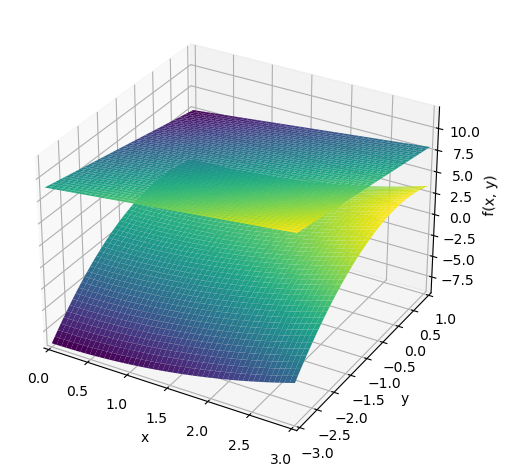

In [9]:
zz= solve(planeM, z)[0]
display(sympy.Eq(z, zz))
plot3d(zz, f, (x, 0, 3), (y, -3, 1))